In [36]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , f1_score, recall_score



In [37]:
load_dotenv(".env")
api_key=os.getenv("API_KEY")
api_username=os.getenv("API_USERNAME")

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
!pip install kaggle

In [40]:

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
import kagglehub

path = kagglehub.dataset_download("erdemtaha/cancer-data")


In [42]:
os.listdir(path)

['Cancer_Data.csv']

In [43]:
df=pd.read_csv(os.path.join(path,"Cancer_Data.csv"))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
df.isnull().sum()

#no missing values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [45]:
df["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [46]:
df["Unnamed: 32"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

The "Unnamed: 32 column is just full  of NaN values , we can simply drop this column.
We can also drop the id column as its just identifiers , not really features

In [47]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)


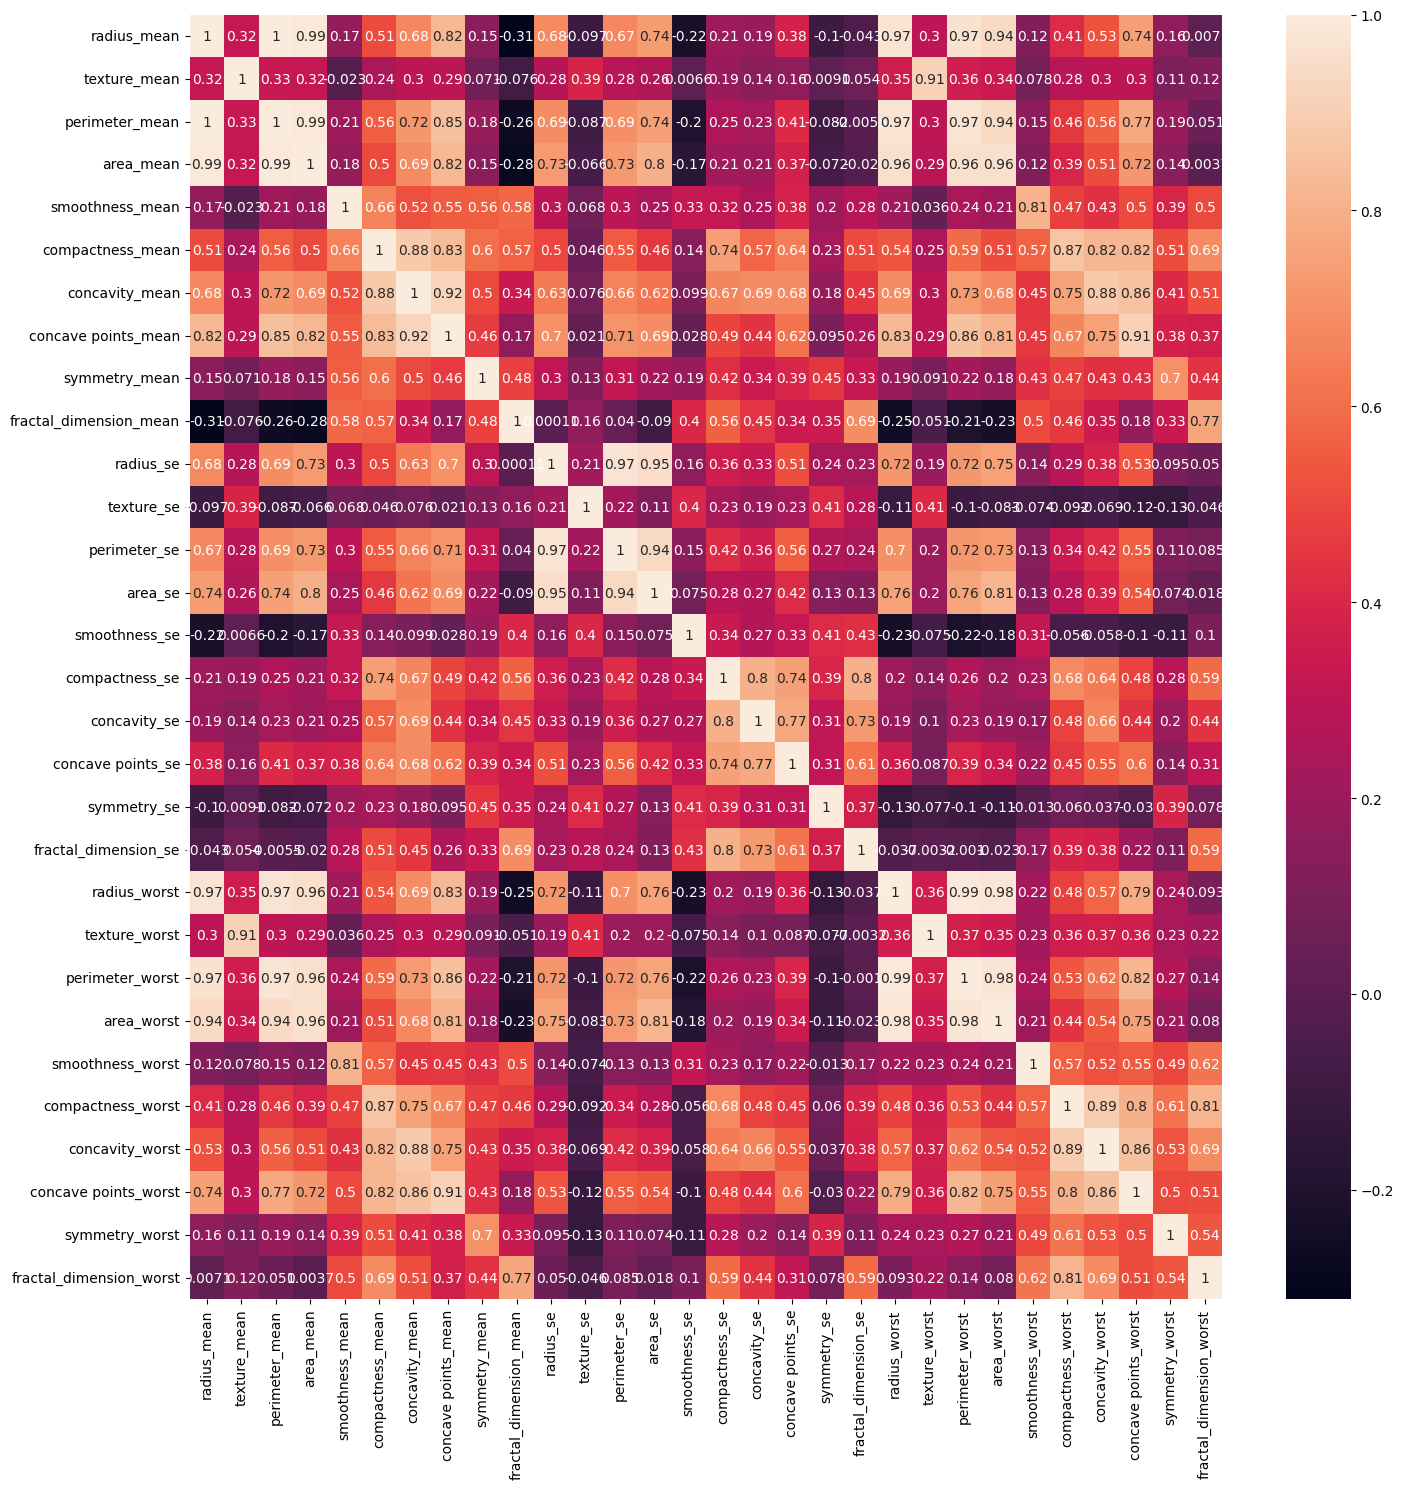

In [48]:
#@title Plotting a heatmap of the correlation matrix of features

corr_matrix=df.drop('diagnosis',axis=1).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.tight_layout()

In [49]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

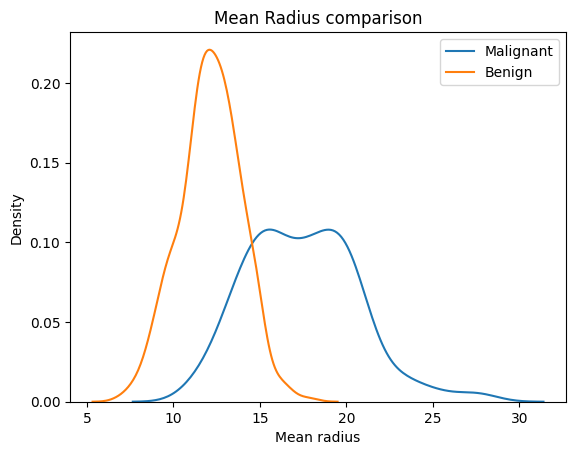

Mean radius of malignant cancers:  17.462830188679245
Mean radius of benign cancers:  12.146523809523808


In [50]:
#@title Looking at the mean radii of the cancers:
sns.kdeplot(df[df["diagnosis"]=="M"]["radius_mean"], label="Malignant")
sns.kdeplot(df[df["diagnosis"]=="B"]["radius_mean"],label="Benign")
plt.title("Mean Radius comparison")
plt.xlabel("Mean radius")
plt.ylabel("Density")
plt.legend()
plt.show()

print("Mean radius of malignant cancers: ",df[df["diagnosis"]=="M"]["radius_mean"].mean())
print("Mean radius of benign cancers: ",df[df["diagnosis"]=="B"]["radius_mean"].mean())


We see that malignant cancers have a larger mean radius compared to benign cancers

<Axes: xlabel='diagnosis', ylabel='Count'>

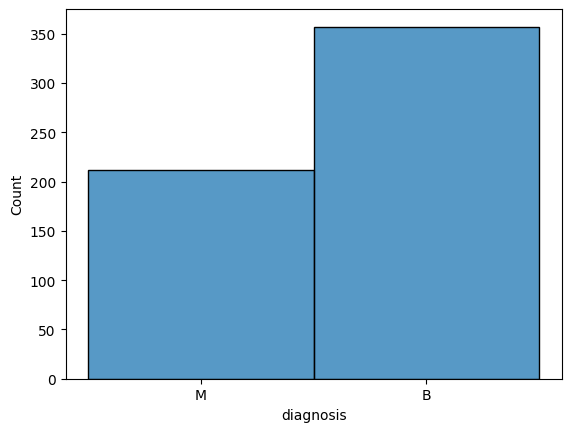

In [51]:
sns.histplot(x=df['diagnosis'])

In [52]:
#@title Encoding the class ("diagnosis")
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["diagnosis"]=le.fit_transform(df["diagnosis"])
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

We have encoded "M" as 1 and "B" as 0

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , f1_score, roc_auc_score

In [54]:
#@title Splitting the dataset:
X_train, X_test , y_train , y_test = train_test_split(df.drop("diagnosis",axis=1),df["diagnosis"],test_size=0.2,random_state=42)

In [55]:
#@title Scaling the data:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [56]:
#@title Using GridSearchCV for parameter fine-tuning:
knn=KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV , StratifiedKFold
params={"n_neighbors": list(range(1,40)),
        "weights":['uniform' , 'distance'],
        "p":[1,2]} #1: Manhattan distance , 2: Euclidean distance
cross_val=StratifiedKFold(n_splits=10 , shuffle=True,random_state=42)
grid=GridSearchCV(knn,params,cv=cross_val,scoring="accuracy")
grid.fit(X_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


In [57]:
print("Best parameters:",grid.best_params_)

Best parameters: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


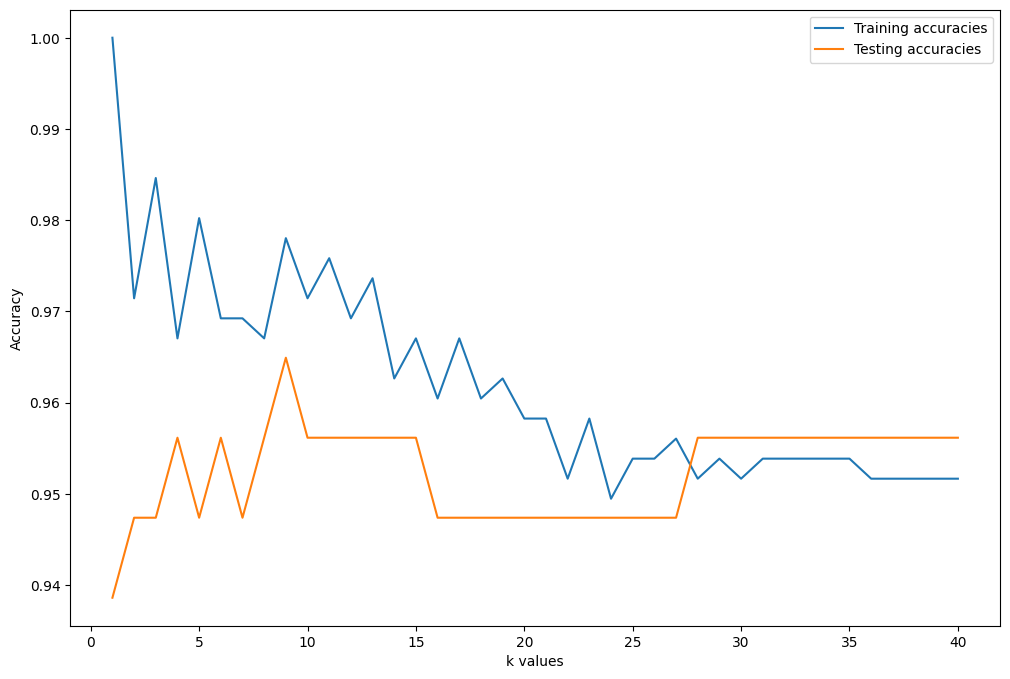

In [58]:
#@title Plotting the accuracy scores:

train_acc=[]
test_acc=[]
k_range=range(1,41)#k values from 1-40
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test , y_test))
plt.figure(figsize=(12,8))
plt.plot(k_range , train_acc , label="Training accuracies")
plt.plot(k_range , test_acc , label="Testing accuracies")
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We see that a k value close to 5 gives us the best result from the GridSearchCV.

In [59]:
#updating the model
best_knn=grid.best_estimator_
best_knn.fit(X_train , y_train)
y_pred=best_knn.predict(X_test)
print("accuracy score: ", accuracy_score(y_test,y_pred))
print("recall score: ",recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))

accuracy score:  0.956140350877193
recall score:  0.9534883720930233
f1_score:  0.9425287356321839


Text(50.722222222222214, 0.5, 'Actual')

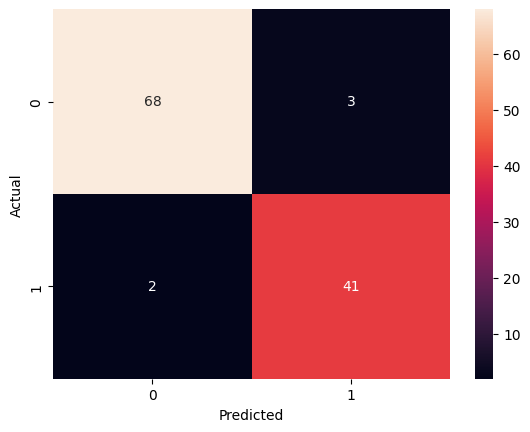

In [60]:
#@title Plotting the confusion matrix

c_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(c_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

We see from the confusion matrix that we have:

True negatives: 68 (predicted benign)

True positives: 41 (predicted malignant)

False negatives: 2 (predicted benign but actually malignant)

False positives: 3 (predicted malignant but actually benign)

These are pretty good scores for this dataset , we have 3 false alarms and only 2 missed cases. The high acurracy and recall show that the model generalises well